In [2]:
import pandas as pd

file_path = "Simplified_Ath_Data3.csv"
df = pd.read_csv(file_path)
df

,Age,Concussion Number,PCS Symptom Severity,Total MFQ Score,Headache,Dizziness,Mentally Foggy,Sadness,Sex_Female,Sex_Male,Sport_Cheerleading,Sport_Hockey,Sport_Lacrosse,Sport_Rugby,Sport_Soccer,Concussion History_No,Concussion History_Yes,Depression Diagnosis_No,Depression Diagnosis_Yes
0,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0,0,1,0,0,0,0,1,1,0
1,0.0,0.666667,0.000000,0.094340,0.000000,0.000000,0.000000,0.0,1,0,0,1,0,0,0,0,1,1,0
2,0.2,0.333333,0.000000,0.075472,0.000000,0.000000,0.000000,0.0,1,0,0,0,0,1,0,0,1,1,0
3,0.2,0.333333,0.259615,0.188679,0.666667,0.000000,0.000000,0.0,1,0,0,0,0,1,0,0,1,1,0
4,0.4,0.333333,0.009615,0.018868,0.000000,0.000000,0.000000,0.0,1,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.4,0.000000,0.125000,0.000000,0.000000,0.000000,0.166667,0.0,0,1,0,1,0,0,0,1,0,1,0
144,0.0,0.000000,0.230769,0.188679,0.666667,0.000000,0.000000,0.0,0,1,0,0,0,0,1,1,0,0,1
145,0.6,0.333333,0.115385,0.150943,0.000000,0.000000,0.000000,0.0,0,1,0,0,1,0,0,0,1,0,1
146,0.8,0.333333,0.000000,0.094340,0.000000,0.000000,0.000000,0.0,0,1,0,0,1,0,0,0,1,0,1


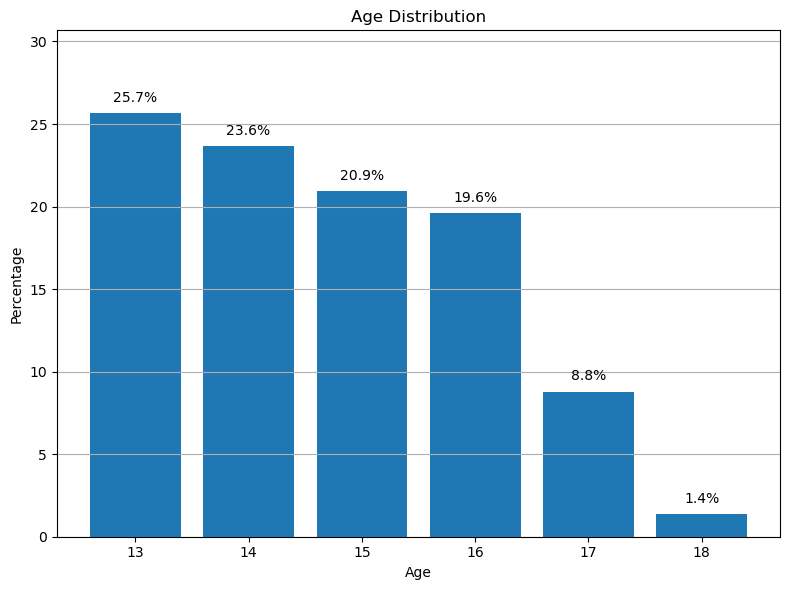

In [11]:
# Calculate percentage distribution
age_counts = df['Age Label'].value_counts().sort_index()
age_percentages = (age_counts / age_counts.sum()) * 100

# Plot with percentages on bars
plt.figure(figsize=(8, 6))
bars = plt.bar(age_percentages.index, age_percentages.values)

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, age_percentages.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.ylim(0, age_percentages.max() + 5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

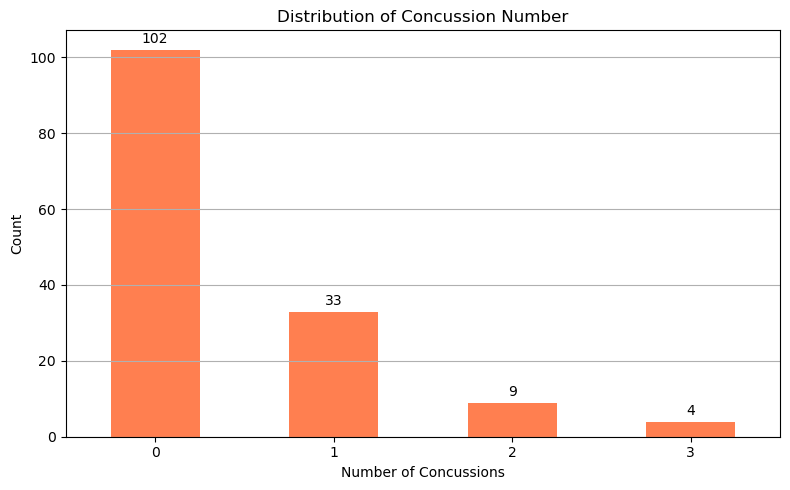

In [54]:
# Map normalized concussion number to actual values
concussion_mapping = {
    0.0: '0',
    0.33333: '1',
    0.66667: '2',
    1.0: '3'
}

# Round to match mapping keys 
df['Concussion Number Label'] = df['Concussion Number'].round(5).map(concussion_mapping)

# Plot distribution
plt.figure(figsize=(8, 5))
bars = df['Concussion Number Label'].value_counts().sort_index().plot(kind='bar', color='coral')

# Add counts on top of bars
for bar in bars.containers[0]:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom')

plt.title('Distribution of Concussion Number')
plt.xlabel('Number of Concussions')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

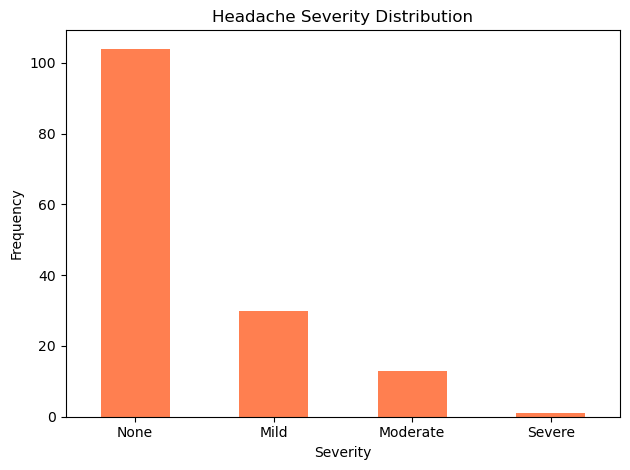

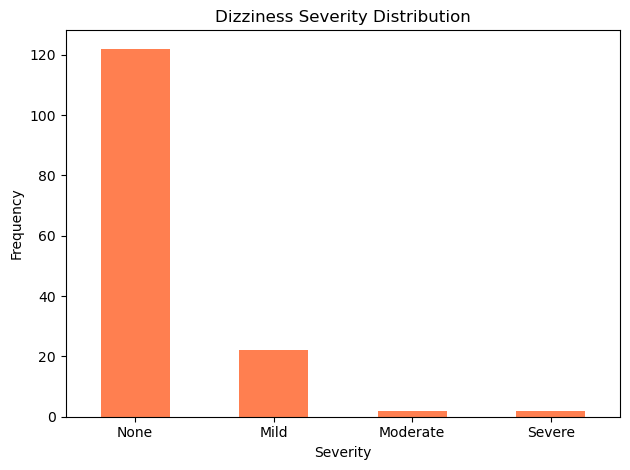

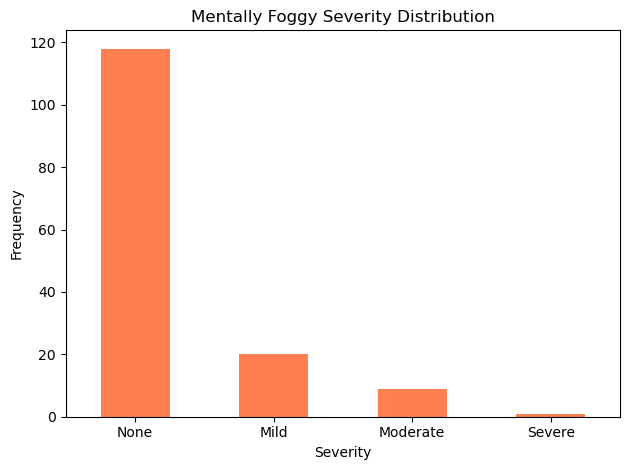

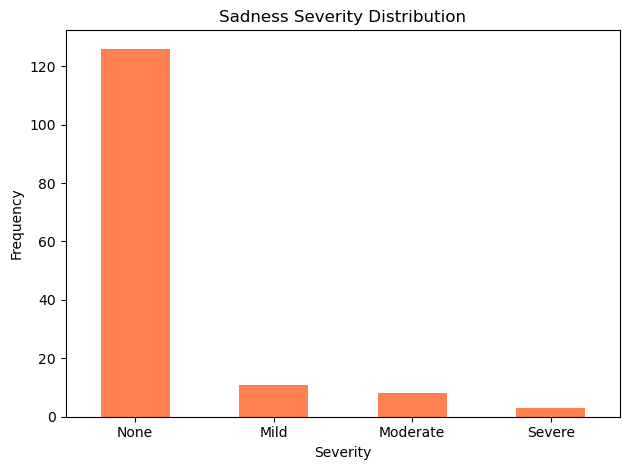

In [52]:
import matplotlib.pyplot as plt

# Define symptom variables and their categories
symptom_vars = ["Headache", "Dizziness", "Mentally Foggy", "Sadness"]
category_labels = ["None", "Mild", "Moderate", "Severe"]

# Function to map scaled symptom values (0-1) into categories
def categorize_symptom(value):
    if value == 0:
        return "None"
    elif value <= 2/6:
        return "Mild"
    elif value <= 4/6:
        return "Moderate"
    else:
        return "Severe"

# Apply categorization
categorized_df = df.copy()
for var in symptom_vars:
    categorized_df[var + "_Category"] = categorized_df[var].apply(categorize_symptom)

# Plot frequency distribution for each symptom variable
for var in symptom_vars:
    counts = categorized_df[var + "_Category"].value_counts().reindex(category_labels, fill_value=0)
    plt.figure()
    counts.plot(kind="bar", color='coral')
    plt.title(f"{var} Severity Distribution")
    plt.xlabel("Severity")
    plt.ylabel("Frequency")
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.show()

<Figure size 800x500 with 0 Axes>

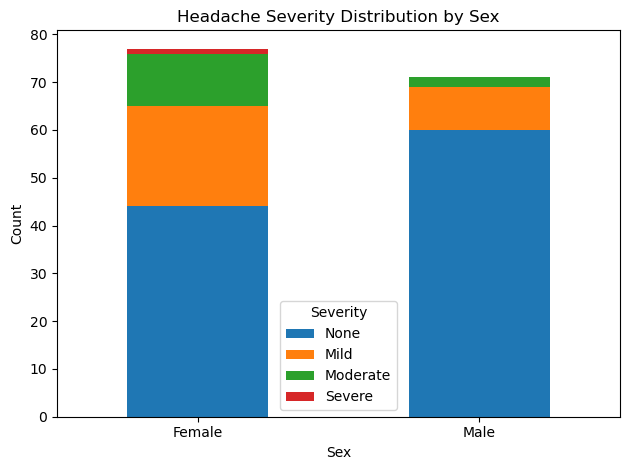

<Figure size 800x500 with 0 Axes>

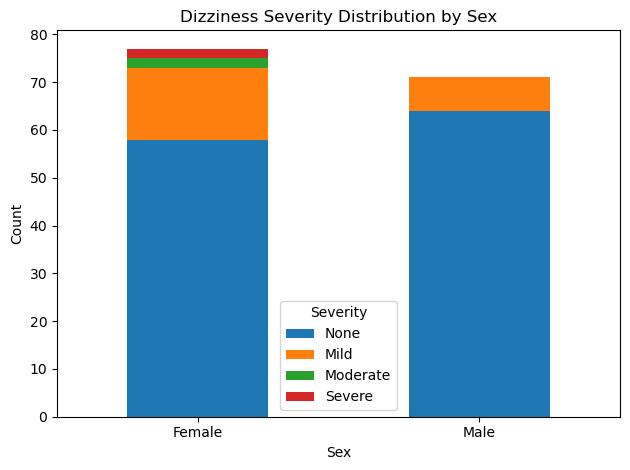

<Figure size 800x500 with 0 Axes>

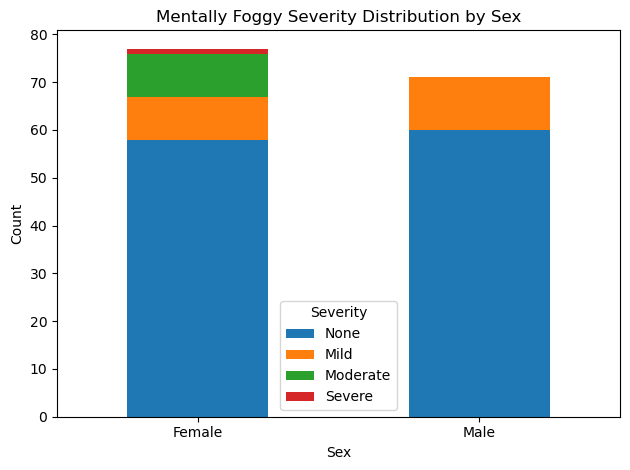

<Figure size 800x500 with 0 Axes>

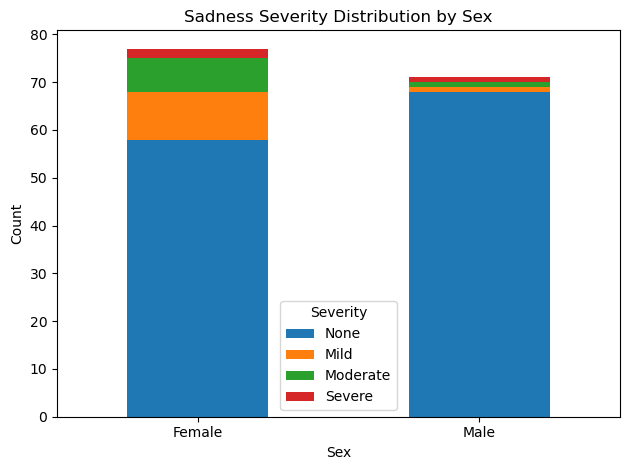

<Figure size 800x500 with 0 Axes>

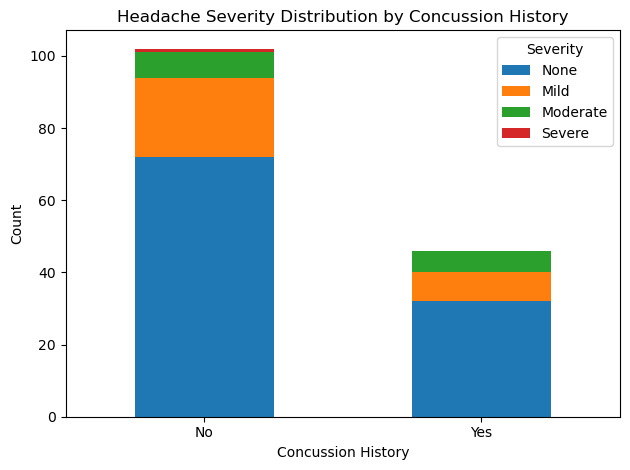

<Figure size 800x500 with 0 Axes>

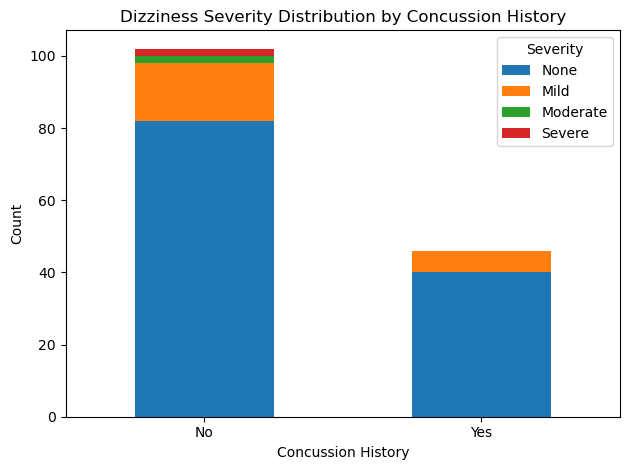

<Figure size 800x500 with 0 Axes>

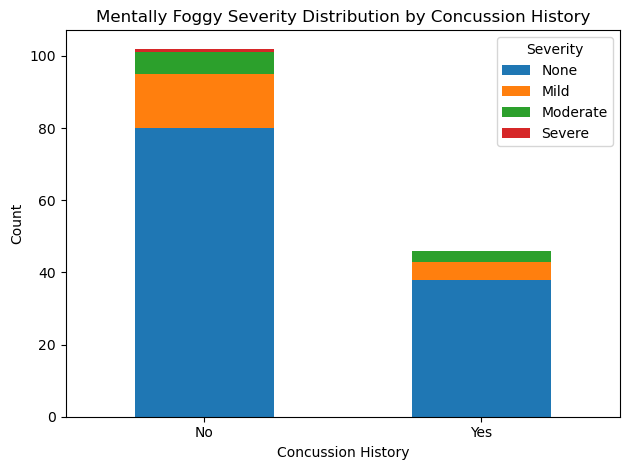

<Figure size 800x500 with 0 Axes>

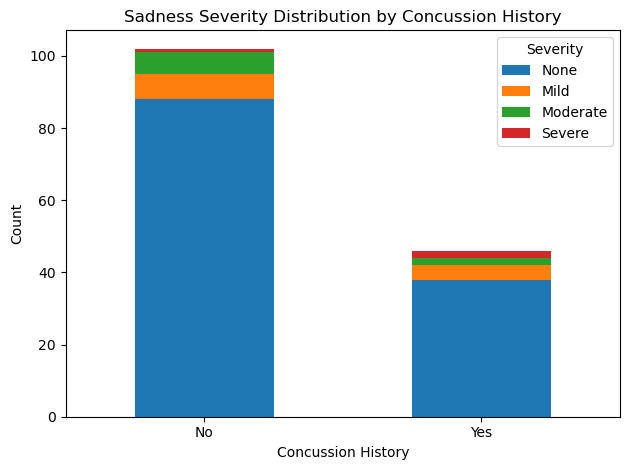

In [13]:
# Convert one-hot encoded sex and concussion history into single label columns
categorized_df["Sex"] = df.apply(lambda row: "Female" if row["Sex_Female"] == 1 else "Male", axis=1)
categorized_df["Concussion History"] = df.apply(lambda row: "Yes" if row["Concussion History_Yes"] == 1 else "No", axis=1)

# Melt the data to long format for faceted plotting
sex_melted = categorized_df.melt(id_vars=["Sex"], 
                                 value_vars=[var + "_Category" for var in symptom_vars],
                                 var_name="Symptom", 
                                 value_name="Severity")
sex_melted["Symptom"] = sex_melted["Symptom"].str.replace("_Category", "")

concussion_melted = categorized_df.melt(id_vars=["Concussion History"], 
                                        value_vars=[var + "_Category" for var in symptom_vars],
                                        var_name="Symptom", 
                                        value_name="Severity")
concussion_melted["Symptom"] = concussion_melted["Symptom"].str.replace("_Category", "")

# Plot distributions by Sex
for symptom in symptom_vars:
    plt.figure(figsize=(8, 5))
    subset = sex_melted[sex_melted["Symptom"] == symptom]
    crosstab = pd.crosstab(subset["Sex"], subset["Severity"]).reindex(columns=category_labels, fill_value=0)
    crosstab.plot(kind="bar", stacked=True)
    plt.title(f"{symptom} Severity Distribution by Sex")
    plt.xlabel("Sex")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot distributions by Concussion History
for symptom in symptom_vars:
    plt.figure(figsize=(8, 5))
    subset = concussion_melted[concussion_melted["Symptom"] == symptom]
    crosstab = pd.crosstab(subset["Concussion History"], subset["Severity"]).reindex(columns=category_labels, fill_value=0)
    crosstab.plot(kind="bar", stacked=True)
    plt.title(f"{symptom} Severity Distribution by Concussion History")
    plt.xlabel("Concussion History")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [26]:
import numpy as np
import scipy.stats as stats

# Update symptom variable names based on correct column headers
symptom_vars = ['Headache', 'Dizziness', 'Mentally Foggy', 'Sadness']

# Create a results list
chi2_results = []

# Perform chi-square test and calculate Cramér's V for each symptom
for symptom in symptom_vars:
    contingency_table = pd.crosstab(df['Concussion History_Yes'], df[symptom])
    chi2, p, dof, _ = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    chi2_results.append({
        'Symptom': symptom,
        'Chi2': chi2,
        'p-value': p,
        'Cramers V': cramers_v
    })

# Convert results to DataFrame for display
conc_chi2_df = pd.DataFrame(chi2_results)
conc_chi2_df

,Symptom,Chi2,p-value,Cramers V
0,Headache,5.318323,0.378279,0.189564
1,Dizziness,2.299969,0.680775,0.124661
2,Mentally Foggy,1.164827,0.948207,0.088716
3,Sadness,11.394552,0.076921,0.277471


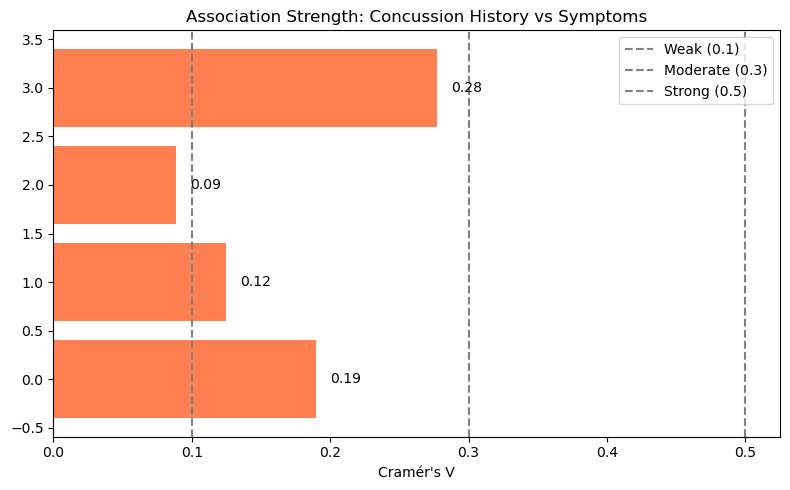

In [50]:
# Plot horizontal bar chart with Cramér's V values for concussion history
plt.figure(figsize=(8, 5))
bars = plt.barh(conc_chi2_df.index, conc_chi2_df['Cramers V'], color='coral')

# Add Cramér's V interpretation threshold lines
plt.axvline(0.1, color='gray', linestyle='--', label='Weak (0.1)')
plt.axvline(0.3, color='gray', linestyle='--', label='Moderate (0.3)')
plt.axvline(0.5, color='gray', linestyle='--', label='Strong (0.5)')

# Annotate each bar with the exact value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.xlabel("Cramér's V")
plt.title("Association Strength: Concussion History vs Symptoms")
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Define the sex columns
sex_columns = ['Sex_Male', 'Sex_Female']

# Perform chi-square and Cramér's V tests for each symptom by sex
results_by_sex = []

for sex_col in sex_columns:
    for symptom in symptom_vars:
        contingency_table = pd.crosstab(df[sex_col], df[symptom])
        chi2, p, dof, _ = stats.chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        results_by_sex.append({
            'Sex': sex_col.replace('Sex_', ''),
            'Symptom': symptom,
            'Chi2': chi2,
            'p-value': p,
            'Cramers V': cramers_v
        })

# Convert to DataFrame and display
sex_chi2_df = pd.DataFrame(results_by_sex)
sex_chi2_df

,Sex,Symptom,Chi2,p-value,Cramers V
0,Male,Headache,17.459111,0.003707,0.343463
1,Male,Dizziness,10.410830,0.034048,0.265223
2,Male,Mentally Foggy,10.474537,0.062853,0.266034
3,Male,Sadness,14.351773,0.025944,0.311402
4,Female,Headache,17.459111,0.003707,0.343463
5,Female,Dizziness,10.410830,0.034048,0.265223
6,Female,Mentally Foggy,10.474537,0.062853,0.266034
7,Female,Sadness,14.351773,0.025944,0.311402


In [23]:
# Identify sport dummy columns
sport_columns = [col for col in df.columns if col.startswith('Sport_')]

# Run chi-square and Cramér's V tests for each symptom by sport
sport_results = []

for sport_col in sport_columns:
    for symptom in symptom_vars:
        contingency_table = pd.crosstab(df[sport_col], df[symptom])
        chi2, p, dof, _ = stats.chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        sport_results.append({
            'Sport': sport_col.replace('Sport_', ''),
            'Symptom': symptom,
            'Chi2': chi2,
            'p-value': p,
            'Cramers V': cramers_v
        })

# Convert to DataFrame and display
sport_chi2_df = pd.DataFrame(sport_results)
sport_chi2_df

,Sport,Symptom,Chi2,p-value,Cramers V
0,Cheerleading,Headache,8.329638,0.138980,0.237237
1,Cheerleading,Dizziness,8.760213,0.067381,0.243291
2,Cheerleading,Mentally Foggy,18.471069,0.002410,0.353277
3,Cheerleading,Sadness,31.169588,0.000024,0.458918
4,Hockey,Headache,4.899168,0.428310,0.181941
5,Hockey,Dizziness,15.026755,0.004646,0.318641
6,Hockey,Mentally Foggy,3.295967,0.654459,0.149232
7,Hockey,Sadness,9.369035,0.153863,0.251603
8,Lacrosse,Headache,8.982702,0.109756,0.246361
9,Lacrosse,Dizziness,3.329905,0.504208,0.149998


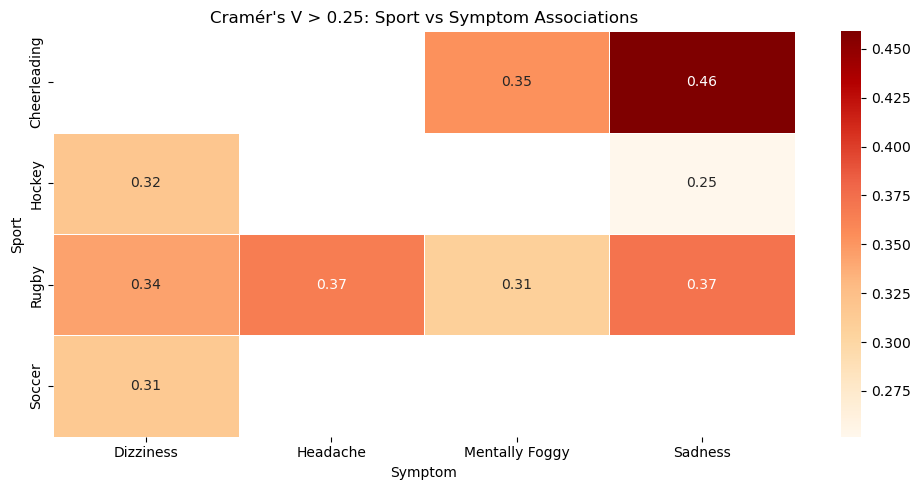

In [29]:
# Filter for sports with Cramér's V > 0.25
filtered_sport_df = sport_chi2_df[sport_chi2_df['Cramers V'] > 0.25]

# Pivot the DataFrame for heatmap format
heatmap_data = filtered_sport_df.pivot(index='Sport', columns='Symptom', values='Cramers V')

# Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=True, cmap="OrRd", fmt=".2f", linewidths=0.5, linecolor='white')
plt.title("Cramér's V > 0.25: Sport vs Symptom Associations")
plt.ylabel("Sport")
plt.xlabel("Symptom")
plt.tight_layout()
plt.show()

In [30]:
# Perform chi-square and Cramér's V tests between Concussion Number and each symptom
concussion_num_results = []

for symptom in symptom_vars:
    contingency_table = pd.crosstab(df['Concussion Number'], df[symptom])
    chi2, p, dof, _ = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    concussion_num_results.append({
        'Symptom': symptom,
        'Chi2': chi2,
        'p-value': p,
        'Cramers V': cramers_v
    })

# Convert to DataFrame and display
concussion_num_chi2_df = pd.DataFrame(concussion_num_results)
concussion_num_chi2_df

,Symptom,Chi2,p-value,Cramers V
0,Headache,25.398385,0.044842,0.239173
1,Dizziness,18.405527,0.103921,0.203602
2,Mentally Foggy,10.085710,0.814314,0.150717
3,Sadness,36.785738,0.005588,0.287838


In [32]:
# Define mapping again for accuracy
concussion_mapping = {
    0.33333: 1,
    0.66667: 2,
    1.0: 3
}

# Filter dataset for 1–3 concussions
df_concussed = df[df['Concussion Number'].round(5).isin(concussion_mapping.keys())].copy()
df_concussed['Concussion Count'] = df_concussed['Concussion Number'].round(5).map(concussion_mapping)

# Perform chi-square tests for concussion count (1–3) and symptoms
from scipy.stats import chi2_contingency
results = []

for symptom in symptom_vars:
    contingency = pd.crosstab(df_concussed['Concussion Count'], df_concussed[symptom])
    chi2, p, dof, _ = chi2_contingency(contingency)
    n = contingency.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
    results.append({
        'Symptom': symptom,
        'Chi2': chi2,
        'p-value': p,
        'Cramers V': cramers_v
    })

# Convert to DataFrame for display
df_concussion_123 = pd.DataFrame(results)
df_concussion_123

,Symptom,Chi2,p-value,Cramers V
0,Headache,18.036165,0.020957,0.442770
1,Dizziness,18.400000,0.001031,0.447214
2,Mentally Foggy,8.742690,0.364465,0.308268
3,Sadness,11.493886,0.320355,0.353459


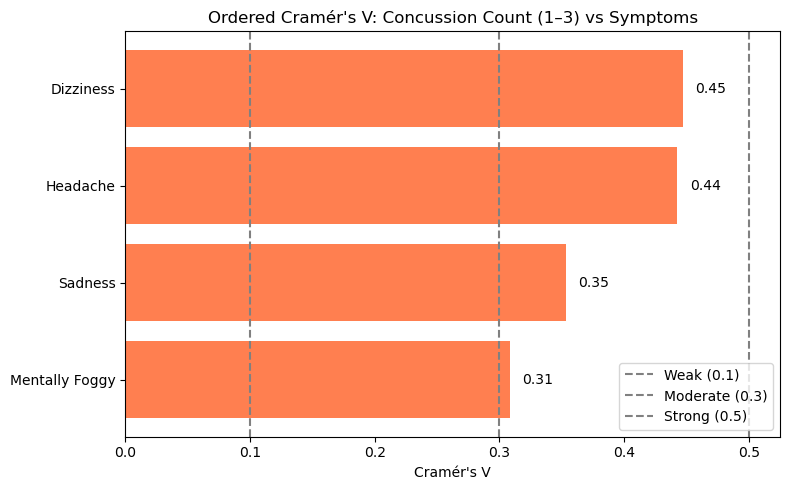

In [51]:
# Sort the DataFrame by Cramér's V in descending order
df_concussion_123_sorted = df_concussion_123.sort_values(by='Cramers V', ascending=True)

# Plot sorted horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(df_concussion_123_sorted['Symptom'], df_concussion_123_sorted['Cramers V'], color='coral')

# Add threshold lines
plt.axvline(0.1, color='gray', linestyle='--', label='Weak (0.1)')
plt.axvline(0.3, color='gray', linestyle='--', label='Moderate (0.3)')
plt.axvline(0.5, color='gray', linestyle='--', label='Strong (0.5)')

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.xlabel("Cramér's V")
plt.title("Ordered Cramér's V: Concussion Count (1–3) vs Symptoms")
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
# Perform chi-square and Cramér's V tests for Depression Diagnosis vs each symptom
depression_results = []

for symptom in symptom_vars:
    contingency_table = pd.crosstab(df['Depression Diagnosis_Yes'], df[symptom])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    depression_results.append({
        'Symptom': symptom,
        'Chi2': chi2,
        'p-value': p,
        'Cramers V': cramers_v
    })

# Convert to DataFrame and display
depression_chi2_df = pd.DataFrame(depression_results)
depression_chi2_df

,Symptom,Chi2,p-value,Cramers V
0,Headache,14.789036,0.011303,0.316111
1,Dizziness,16.208795,0.002751,0.330936
2,Mentally Foggy,22.022843,0.000518,0.385750
3,Sadness,15.680530,0.015575,0.325499


In [36]:
# ML
# Logistic regression
import statsmodels.api as sm
from statsmodels.tools import add_constant

# Define predictors and outcomes
cheer_col = 'Sport_Cheerleading'
outcomes = ['Sadness', 'Headache']

# Run logistic regressions and store results
logit_results = {}

for outcome in outcomes:
    X = add_constant(df[[cheer_col]])  # Predictor: Cheerleading
    y = df[outcome]
    model = sm.Logit(y, X).fit(disp=False)
    logit_results[outcome] = model.summary2().tables[1]  # Store coefficient table

# Display the results for both models
logit_results

{'Sadness':                        Coef.  Std.Err.         z         P>|z|    [0.025  \
 const              -2.883574  0.393099 -7.335485  2.209193e-13 -3.654034   
 Sport_Cheerleading  1.142076  0.754536  1.513615  1.301236e-01 -0.336786   
 
                       0.975]  
 const              -2.113113  
 Sport_Cheerleading  2.620938  ,
 'Headache':                        Coef.  Std.Err.         z         P>|z|    [0.025  \
 const              -2.202980  0.294160 -7.489041  6.937876e-14 -2.779524   
 Sport_Cheerleading  0.062914  0.803339  0.078315  9.375772e-01 -1.511602   
 
                       0.975]  
 const              -1.626436  
 Sport_Cheerleading  1.637430  }

In [37]:
# Define additional control variables
control_vars = ['Concussion History_Yes', 'Sex_Male', 'Depression Diagnosis_Yes']
predictors = [cheer_col] + control_vars

# Run logistic regressions with controls
logit_results_controlled = {}

for outcome in outcomes:
    X = add_constant(df[predictors])
    y = df[outcome]
    model = sm.Logit(y, X).fit(disp=False)
    logit_results_controlled[outcome] = model.summary2().tables[1]

# Display the results
logit_results_controlled

{'Sadness':                              Coef.  Std.Err.         z     P>|z|    [0.025  \
 const                    -2.669792  0.568493 -4.696265  0.000003 -3.784017   
 Sport_Cheerleading        0.522432  0.816816  0.639595  0.522436 -1.078498   
 Concussion History_Yes    0.661293  0.721680  0.916324  0.359497 -0.753173   
 Sex_Male                 -1.655126  0.959933 -1.724209  0.084670 -3.536560   
 Depression Diagnosis_Yes  1.606053  0.932147  1.722960  0.084896 -0.220923   
 
                             0.975]  
 const                    -1.555567  
 Sport_Cheerleading        2.123361  
 Concussion History_Yes    2.075759  
 Sex_Male                  0.226309  
 Depression Diagnosis_Yes  3.433028  ,
 'Headache':                              Coef.  Std.Err.         z     P>|z|    [0.025  \
 const                    -1.840002  0.421344 -4.366984  0.000013 -2.665821   
 Sport_Cheerleading       -0.576426  0.850212 -0.677979  0.497785 -2.242811   
 Concussion History_Yes    0.281029

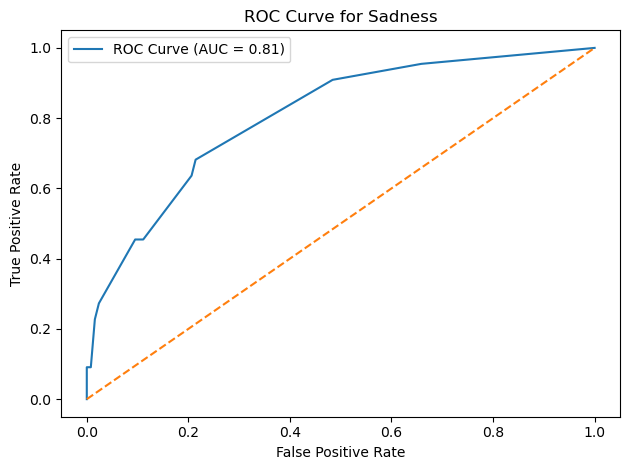

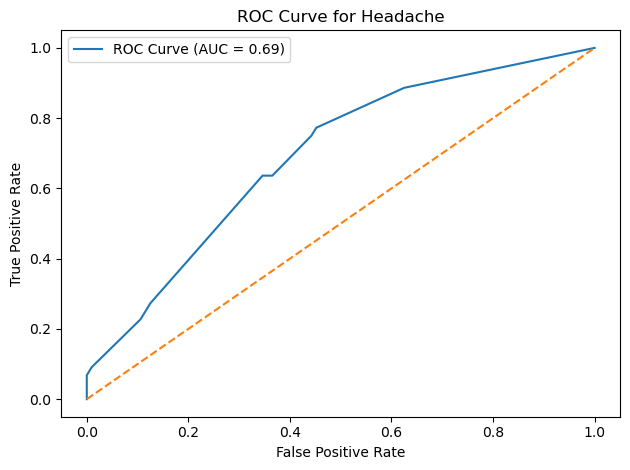

,Outcome,ROC AUC
0,Sadness,0.805195
1,Headache,0.691543


In [55]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Binarize symptom outcomes again (1 if symptom score > 0, else 0)
df_binary = df.copy()
for symptom in symptom_vars:
    df_binary[symptom + '_Binary'] = (df_binary[symptom] > 0).astype(int)

# Binary outcomes for analysis
binary_outcomes = [sym + '_Binary' for sym in outcomes]

# Refit models and calculate ROC AUC for binary outcomes
auc_results_binary = []

for outcome in binary_outcomes:
    X = add_constant(df_binary[predictors])
    y = df_binary[outcome]
    model = sm.Logit(y, X).fit(disp=False)
    
    y_pred_prob = model.predict(X)
    
    auc = roc_auc_score(y, y_pred_prob)
    auc_results_binary.append({'Outcome': outcome.replace('_Binary', ''), 'ROC AUC': auc})
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f"ROC Curve for {outcome.replace('_Binary', '')}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Display AUC results
auc_df_binary = pd.DataFrame(auc_results_binary)
auc_df_binary

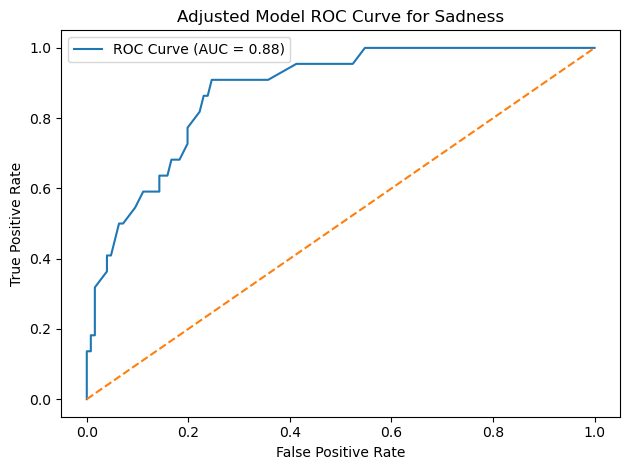

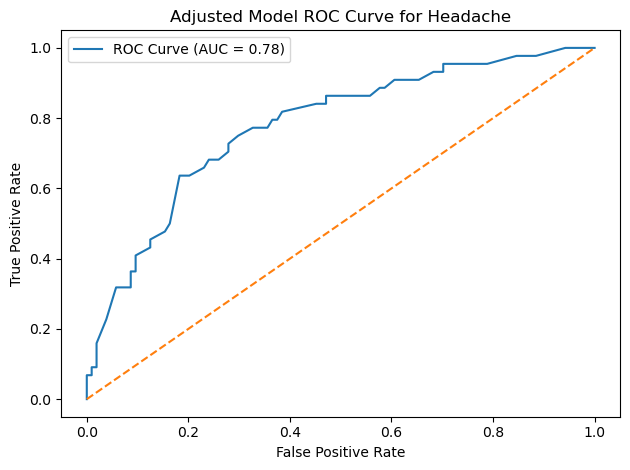

,Outcome,ROC AUC
0,Sadness,0.876623
1,Headache,0.777753


In [40]:
# Drop one sport dummy to avoid multicollinearity
adjusted_features = [
    'Concussion Number', 'Age',
    'Sport_Cheerleading', 'Sport_Hockey', 'Sport_Lacrosse', 'Sport_Rugby',  # Dropped 'Sport_Soccer'
    'Concussion History_Yes', 'Sex_Male', 'Depression Diagnosis_Yes'
]

# Run logistic regression with adjusted features and calculate ROC AUC
auc_results_adjusted = []

for outcome in binary_outcomes:
    X = add_constant(df_binary[adjusted_features])
    y = df_binary[outcome]
    model = sm.Logit(y, X).fit(disp=False)

    y_pred_prob = model.predict(X)
    auc = roc_auc_score(y, y_pred_prob)
    auc_results_adjusted.append({'Outcome': outcome.replace('_Binary', ''), 'ROC AUC': auc})

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f"Adjusted Model ROC Curve for {outcome.replace('_Binary', '')}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Display AUC results
auc_df_adjusted = pd.DataFrame(auc_results_adjusted)
auc_df_adjusted

In [41]:
# Fit models again and extract coefficients with significance
feature_influence = {}

for outcome in binary_outcomes:
    X = add_constant(df_binary[adjusted_features])
    y = df_binary[outcome]
    model = sm.Logit(y, X).fit(disp=False)
    summary_df = model.summary2().tables[1]
    summary_df['Odds Ratio'] = np.exp(summary_df['Coef.'])
    feature_influence[outcome.replace('_Binary', '')] = summary_df

# Show results
feature_influence

{'Sadness':                               Coef.      Std.Err.         z     P>|z|  \
 const                    -58.996622  1.223960e+07 -0.000005  0.999996   
 Concussion Number          1.617557  2.333822e+00  0.693094  0.488251   
 Age                        1.622096  1.200619e+00  1.351049  0.176680   
 Sport_Cheerleading        57.996238  1.223960e+07  0.000005  0.999996   
 Sport_Hockey              56.299110  1.223960e+07  0.000005  0.999996   
 Sport_Lacrosse            57.205267  1.223960e+07  0.000005  0.999996   
 Sport_Rugby               57.899058  1.223960e+07  0.000005  0.999996   
 Concussion History_Yes    -0.595988  1.204480e+00 -0.494809  0.620735   
 Sex_Male                  -1.936495  1.136829e+00 -1.703418  0.088490   
 Depression Diagnosis_Yes   2.153352  9.608082e-01  2.241188  0.025014   
 
                                 [0.025        0.975]    Odds Ratio  
 const                    -2.398924e+07  2.398912e+07  2.388321e-26  
 Concussion Number        -2.9566

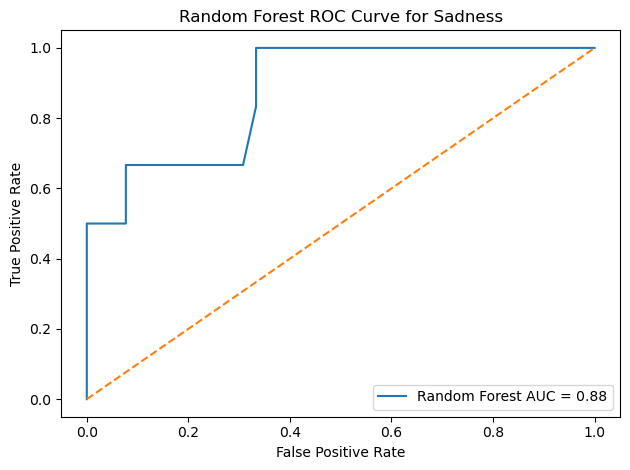

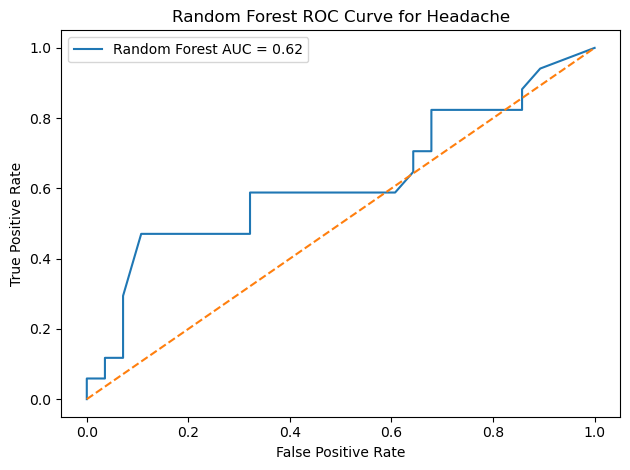

,Model,Sadness AUC,Headache AUC
0,Random Forest,0.878205,0.619748


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare feature matrix and binary outcomes
X = df_binary[adjusted_features]
y_sadness = df_binary['Sadness_Binary']
y_headache = df_binary['Headache_Binary']

# Train-test split
X_train_sad, X_test_sad, y_train_sad, y_test_sad = train_test_split(X, y_sadness, test_size=0.3, random_state=42)
X_train_head, X_test_head, y_train_head, y_test_head = train_test_split(X, y_headache, test_size=0.3, random_state=42)

# Train Random Forest classifiers
rf_sad = RandomForestClassifier(random_state=42)
rf_sad.fit(X_train_sad, y_train_sad)

rf_head = RandomForestClassifier(random_state=42)
rf_head.fit(X_train_head, y_train_head)

# Predict probabilities
y_pred_prob_sad = rf_sad.predict_proba(X_test_sad)[:, 1]
y_pred_prob_head = rf_head.predict_proba(X_test_head)[:, 1]

# Calculate ROC AUC
auc_rf_sad = roc_auc_score(y_test_sad, y_pred_prob_sad)
auc_rf_head = roc_auc_score(y_test_head, y_pred_prob_head)

# Plot ROC curves
for y_test, y_pred_prob, label, auc_val in [
    (y_test_sad, y_pred_prob_sad, "Sadness", auc_rf_sad),
    (y_test_head, y_pred_prob_head, "Headache", auc_rf_head)
]:
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'Random Forest AUC = {auc_val:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f'Random Forest ROC Curve for {label}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Return AUC scores for comparison
pd.DataFrame({
    'Model': ['Random Forest'],
    'Sadness AUC': [auc_rf_sad],
    'Headache AUC': [auc_rf_head]
})

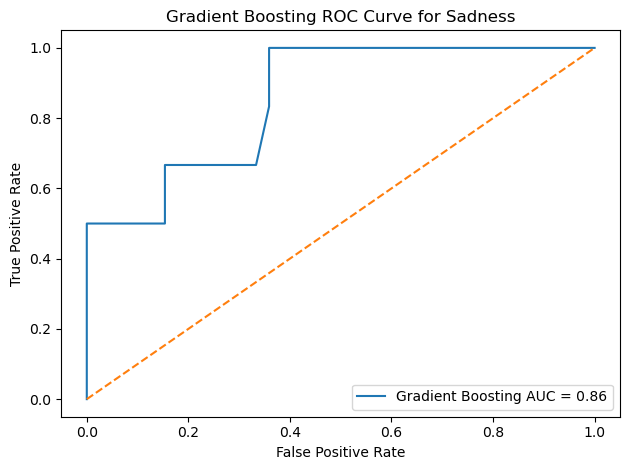

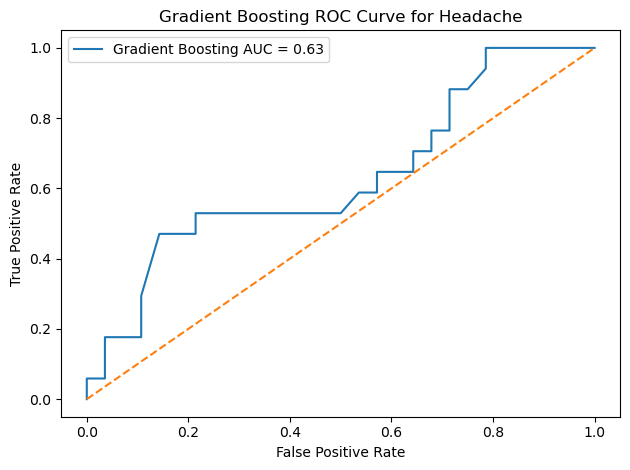

,Model,Sadness AUC,Headache AUC
0,Gradient Boosting,0.856838,0.631303


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting models
gb_sad = GradientBoostingClassifier(random_state=42)
gb_sad.fit(X_train_sad, y_train_sad)
y_pred_prob_sad_gb = gb_sad.predict_proba(X_test_sad)[:, 1]
auc_gb_sad = roc_auc_score(y_test_sad, y_pred_prob_sad_gb)

gb_head = GradientBoostingClassifier(random_state=42)
gb_head.fit(X_train_head, y_train_head)
y_pred_prob_head_gb = gb_head.predict_proba(X_test_head)[:, 1]
auc_gb_head = roc_auc_score(y_test_head, y_pred_prob_head_gb)

# Plot ROC curves
for y_test, y_pred_prob, label, auc_val in [
    (y_test_sad, y_pred_prob_sad_gb, "Sadness", auc_gb_sad),
    (y_test_head, y_pred_prob_head_gb, "Headache", auc_gb_head)
]:
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'Gradient Boosting AUC = {auc_val:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f'Gradient Boosting ROC Curve for {label}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Return AUC scores for comparison
gb_auc_df = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    'Sadness AUC': [auc_gb_sad],
    'Headache AUC': [auc_gb_head]
})
gb_auc_df

In [44]:
# Combine all model AUCs into a single comparison table
full_auc_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Sadness AUC': [auc_df_adjusted.loc[0, 'ROC AUC'], auc_rf_sad, auc_gb_sad],
    'Headache AUC': [auc_df_adjusted.loc[1, 'ROC AUC'], auc_rf_head, auc_gb_head]
})

full_auc_comparison

,Model,Sadness AUC,Headache AUC
0,Logistic Regression,0.876623,0.777753
1,Random Forest,0.878205,0.619748
2,Gradient Boosting,0.856838,0.631303


In [56]:
# Logistic regression accuracy

# Reconstruct binary symptom columns
symptom_vars = ['Sadness', 'Headache']
df_binary = df.copy()
for symptom in symptom_vars:
    df_binary[symptom + '_Binary'] = (df_binary[symptom] > 0).astype(int)

# Define adjusted feature set
adjusted_features = [
    'Concussion Number', 'Age',
    'Sport_Cheerleading', 'Sport_Hockey', 'Sport_Lacrosse', 'Sport_Rugby',
    'Concussion History_Yes', 'Sex_Male', 'Depression Diagnosis_Yes'
]

# Define training/testing data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_binary[adjusted_features]
y_sadness = df_binary['Sadness_Binary']
y_headache = df_binary['Headache_Binary']

X_train_sad, X_test_sad, y_train_sad, y_test_sad = train_test_split(X, y_sadness, test_size=0.3, random_state=42)
X_train_head, X_test_head, y_train_head, y_test_head = train_test_split(X, y_headache, test_size=0.3, random_state=42)

# Fit logistic regression models
lr_sad = LogisticRegression(max_iter=1000)
lr_sad.fit(X_train_sad, y_train_sad)
y_pred_sad = lr_sad.predict(X_test_sad)
accuracy_sad = accuracy_score(y_test_sad, y_pred_sad)

lr_head = LogisticRegression(max_iter=1000)
lr_head.fit(X_train_head, y_train_head)
y_pred_head = lr_head.predict(X_test_head)
accuracy_head = accuracy_score(y_test_head, y_pred_head)

# Display results
pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Sadness Accuracy': [accuracy_sad],
    'Headache Accuracy': [accuracy_head]
})

,Model,Sadness Accuracy,Headache Accuracy
0,Logistic Regression,0.866667,0.622222


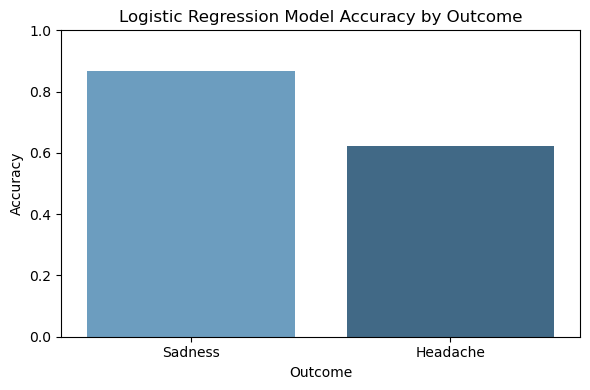

In [58]:
# Prepare data for visualization
accuracy_df = pd.DataFrame({
    'Outcome': ['Sadness', 'Headache'],
    'Accuracy': [accuracy_sad, accuracy_head]
})

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=accuracy_df, x='Outcome', y='Accuracy', palette='Blues_d')
plt.ylim(0, 1)
plt.title('Logistic Regression Model Accuracy by Outcome')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

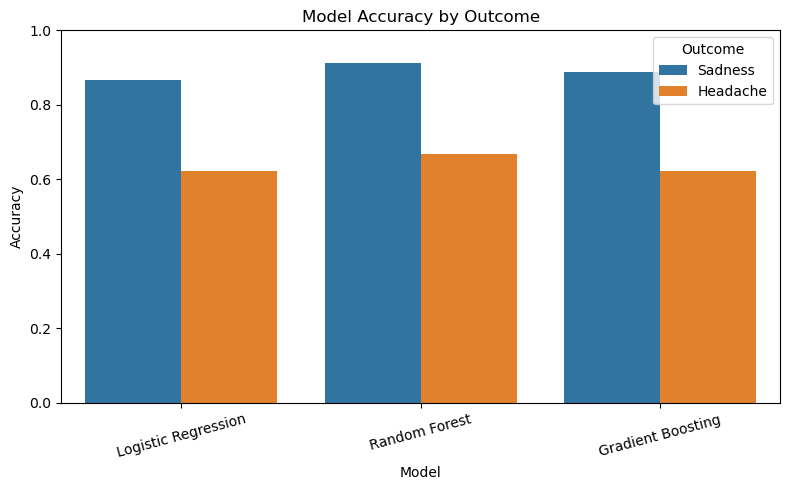

In [59]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Train Random Forest models
rf_sad = RandomForestClassifier(random_state=42)
rf_sad.fit(X_train_sad, y_train_sad)
rf_sad_acc = accuracy_score(y_test_sad, rf_sad.predict(X_test_sad))

rf_head = RandomForestClassifier(random_state=42)
rf_head.fit(X_train_head, y_train_head)
rf_head_acc = accuracy_score(y_test_head, rf_head.predict(X_test_head))

# Train Gradient Boosting models
gb_sad = GradientBoostingClassifier(random_state=42)
gb_sad.fit(X_train_sad, y_train_sad)
gb_sad_acc = accuracy_score(y_test_sad, gb_sad.predict(X_test_sad))

gb_head = GradientBoostingClassifier(random_state=42)
gb_head.fit(X_train_head, y_train_head)
gb_head_acc = accuracy_score(y_test_head, gb_head.predict(X_test_head))

# Combine all accuracies for visualization
accuracy_plot_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression', 'Random Forest', 'Random Forest', 'Gradient Boosting', 'Gradient Boosting'],
    'Outcome': ['Sadness', 'Headache', 'Sadness', 'Headache', 'Sadness', 'Headache'],
    'Accuracy': [accuracy_sad, accuracy_head, rf_sad_acc, rf_head_acc, gb_sad_acc, gb_head_acc]
})

# Plot grouped bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=accuracy_plot_df, x='Model', y='Accuracy', hue='Outcome')
plt.ylim(0, 1)
plt.title('Model Accuracy by Outcome')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()